### Data Init.

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None
)

In [9]:
df.columns = ['Class label', 'Alcohol',
'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity', 'Hue',
'OD280/OD315 of diluted wines',
'Proline']

### Train-Test Split.

In [10]:
from sklearn.model_selection import train_test_split

In [73]:
X, y = df.iloc[:, 2:].values, df.iloc[:, 0].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify = y ) 

In [75]:
X_train.shape

(124, 12)

In [76]:
y_train.shape

(124,)

### Feature Scaling.

In [49]:
''' Most of ML algorithms works better when provided Xs on the same scale.
Still, algos like Decision Trees are not affected.'''

' Most of ML algorithms works better when provided Xs on the same scale.\nStill, algos like Decision Trees are not affected.'

In [50]:
'''In addition to scaling data
such that it has zero mean and unit variance, standardization maintains useful information about
outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales
the data to a limited range of values.'''

'In addition to scaling data\nsuch that it has zero mean and unit variance, standardization maintains useful information about\noutliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales\nthe data to a limited range of values.'

In [51]:
# Normilization. ( 0, 1 )

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mms = MinMaxScaler()

In [15]:
X_train_norm = mms.fit_transform( X_train )
X_test_norm  = mms.fit( X_test )

In [16]:
from sklearn.preprocessing import StandardScaler

In [62]:
std_sc = StandardScaler()

In [57]:
'''Again, it is also important to highlight that we it the StandardScaler class only once—on the training
data—and use those parameters to transform the test dataset or any new data point.'''

'Again, it is also important to highlight that we it the StandardScaler class only once—on the training\ndata—and use those parameters to transform the test dataset or any new data point.'

In [77]:
X_train_std = std_sc.fit_transform( X_train )
X_test_std = std_sc.transform( X_test )

In [78]:
X_train_std.shape
X_test_std.shape

(54, 12)

### Feature Selection. ( Regulization )

In [59]:
"""
If the model's performance is better on the training set than that of test set, it is a sign 
of `overfitting`.

One way to impede that is by regularizatoin:  

    * L1 : sum the abs of each dimension of W.
    * L2 : sum the square of each dimension of W.  

    * L1 : This method is particularly good with big datasets. Because it usually set most
    of the irrelevant weights to 0, it can be used also as feature eliminator. That 
    means, it produces sparse weights.
    * L2 : Its effect on weight vectors is in contrast to the first.

    * lambda : The regulization coefficient. The more it increases the less the model is dependent
    on the training set and the more the weights are closer to 0.

"""

"\nIf the model's performance is better on the training set than that of test set, it is a sign \nof `overfitting`.\n\nOne way to impede that is by regularizatoin:  \n\n    * L1 : sum the abs of each dimension of W.\n    * L2 : sum the square of each dimension of W.  \n\n    * L1 : This method is particularly good with big datasets. Because it usually set most\n    of the irrelevant weights to 0, it can be used also as feature eliminator. That \n    means, it produces sparse weights.\n    * L2 : Its effect on weight vectors is in contrast to the first.\n\n    * lambda : The regulization coefficient. The more it increases the less the model is dependent\n    on the training set and the more the weights are closer to 0.\n\n"

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression( penalty = "l1", C = 1,
                         solver = "liblinear", multi_class = "ovr" )

In [21]:
lr.fit( X_train_std, y_train )

/home/ahmed4/ml.py/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

In [63]:
X_train_std.shape

(124, 13)

In [64]:
print(lr.score( X_test_std, y_test ) )

0.9629629629629629


In [65]:
lr2 = LogisticRegression( penalty = "l2", C = 1,
                         solver = "liblinear", multi_class = "ovr" )

In [66]:
'''
    learner.coef_      = W_j
    learner.intercept_ = b_j
'''

'\n    learner.coef_      = W_j\n    learner.intercept_ = b_j\n'

In [67]:
lr2.fit( X_train_std, y_train )

/home/ahmed4/ml.py/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

In [68]:
lr.intercept_

array([-1.27596071, -0.95341405, -2.35179379])

In [69]:
### Examining different Regularization

In [70]:
import matplotlib.pyplot as plt

In [2]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [6]:
colors = ['blue', 'green', 'red', 'cyan',
'magenta', 'yellow', 'black',
'pink', 'lightgreen', 'lightblue',
'gray', 'indigo', 'orange']

In [ ]:
ax = plt.subplot(111)

In [ ]:
weights, params = [], []
for i in range( -4, 4):
    lr = LogisticRegression( penalty = "l1", solver = "liblinear",
                             multi_class = "ovr", C = 10**i )
    lr.fit( X_train_std, y_train )
    weights.append( lr.coef_[1] )
    params.append( 10**i )

In [88]:
import numpy as np

In [89]:
weights = np.array(weights)

In [109]:
weights.shape

(8, 13)

(0.0001, 10000)

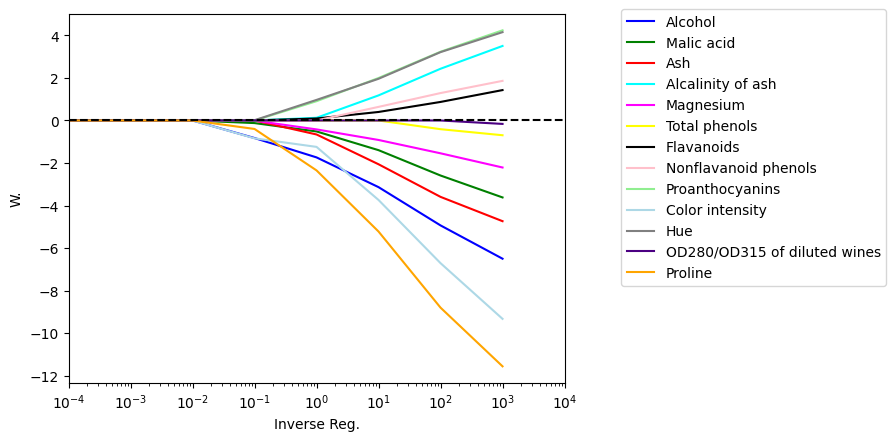

In [125]:
for clmn, clr in zip( range(weights.shape[1]), colors ):
    plt.plot( params, weights[:, clmn], c = clr,
            label = df.columns[clmn + 1])

plt.xscale("log")
plt.xlabel("Inverse Reg.")
plt.ylabel("W.")
plt.legend(bbox_to_anchor = ( 1.1, 1.03 ) )
plt.axhline( 0, c = "black", linestyle = "--" )
plt.xlim( 10**(-4), 10**(4) )

### Feature Extraction/Selction.

In [ ]:
'''
    Greedy Search : Yields suboptimal solutions by making decisions in local stages.
    It is fast, but does not gurantee an optimal solution.

    Exhaustive Search : Yields the most optimal solution by evaluating all possible solutions.
    In real world applications, most of the time, this kind of algos are not feasible.

    Sequential Backward Selection : Keeps removing features that increases the loss, until
    the desired number of features are left.
    
''' 

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [84]:
class SBS:
    def __init__( self, estimator, k_features,
                  scoring = accuracy_score,
                  test_size = 0.25, random_state = 0 ):
        self.scoring = scoring
        self.test_size = test_size
        self.k_features = k_features
        self.estimator = clone(estimator)
        self.random_state = random_state

    def fit( self, X, y ):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = self.test_size,
                                                            random_state = self.random_state )
        dim = X.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [ self.indices_ ]
        score = self._calc_score( X_train, y_train, X_test, y_test, self.indices_ )
        self.scores_ = [score]

        while( self.k_features < dim ):
            scores  = []
            subsets = []

            for p in combinations( self.indices_ , r = dim - 1 ):
                score = self._calc_score( X_train, y_train, X_test, y_test, p )
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append( scores[best] )

        self.k_score_ = self.scores_[-1]
        return self            
                                             

    def transform( self, X ):
        X[:, self.indices_]

    def _calc_score( self, X_train, y_train, X_test, y_test, indices ):
        self.estimator.fit( X_train[:, indices] , y_train )
        y_pred = self.estimator.predict( X_test[:, indices] )
        score = self.scoring( y_test, y_pred ) 
        
        return score

In [69]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [121]:
knn = KNeighborsClassifier( n_neighbors=5 )

In [122]:
sbs = SBS(estimator = knn, k_features=1)

In [123]:
sbs.fit( X_train_std , y_train ) 

In [124]:
k_feat = [ len( k ) for k in sbs.subsets_ ]

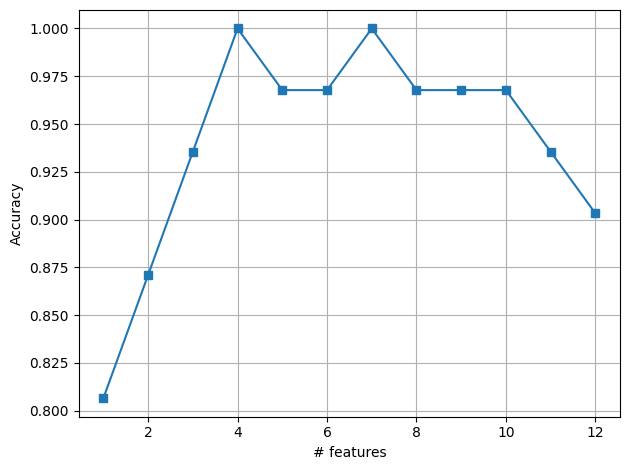

In [126]:
plt.plot( k_feat, sbs.scores_, marker = "s" )
plt.xlabel("# features")
plt.ylabel("Accuracy")
plt.grid()
plt.tight_layout()
plt.show()

In [159]:
k4 = list(sbs.subsets_[8])

In [146]:
df.columns[1:][list(sbs.subsets_[8])]

Index(['Alcohol', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines'], dtype='object')

In [156]:
knn.fit( X_train_std, y_train )

KNeighborsClassifier()

In [157]:
# Test Dataset
knn.score( X_test_std, y_test )

0.9074074074074074

In [158]:
# Train Dataset
knn.score( X_train_std, y_train )

0.9596774193548387

In [162]:
knn.fit( X_train_std[:, k4], y_train )

KNeighborsClassifier()

In [164]:
knn.score( X_test_std[:, k4], y_test )

0.8703703703703703

In [ ]:
'''
    Another way to extract important features from a dataset is by using random forests.
    As you remember standardization is not needed in this kind of algorithms.
'''

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
forest = RandomForestClassifier( n_estimators=500 )

In [167]:
forest.fit( X_train_std, y_train )

RandomForestClassifier(n_estimators=500)

In [169]:
w_imp = forest.feature_importances_

In [208]:
indices = np.argsort(w_imp)[::-1]

In [262]:
names = df.columns[1:]

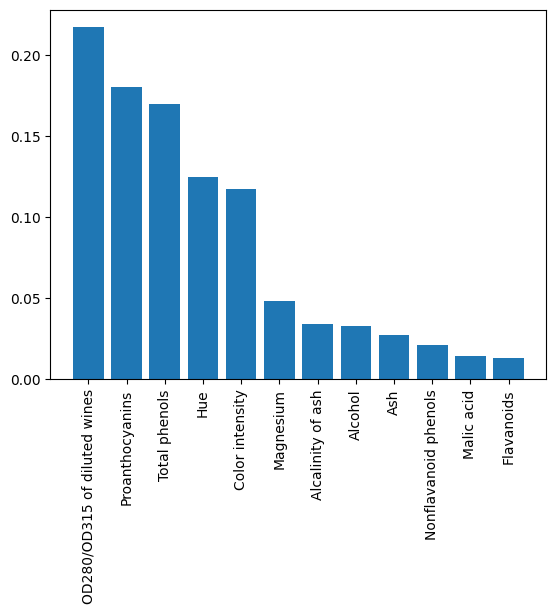

In [268]:
plt.bar( range(X_train.shape[1]),w_imp[indices]  )
plt.xticks( range(X_train.shape[1]), names[indices], rotation = 90 )
plt.show()

In [ ]:
'''
    There is a thing that needs to be considered when using Forest technique to find
    most useful features, if two features are correlated, it is likely that one feature
    will suppress the other. This is a thing that need NOT to be considered when just
    using these models to get predictions.
'''

### Using Sklearn to extract features.

In [269]:
from sklearn.feature_selection import SelectFromModel

In [270]:
sfm = SelectFromModel( forest, threshold = 0.1, prefit = True ) 

In [291]:
best_features = sfm.transform( X_train )

In [303]:
for f in range(best_features.shape[1]):
    print(names[indices[f]],  best_features[indices[f]])

OD280/OD315 of diluted wines [  2.     4.68   1.12   3.48 510.  ]
Proanthocyanins [   2.37    3.93    1.09    3.63 1015.  ]
Total phenols [3.23e+00 6.00e+00 1.07e+00 2.84e+00 1.27e+03]
Hue [  3.1    4.45   1.22   2.87 420.  ]
Color intensity [  0.7    5.28   0.68   1.75 675.  ]
